In [39]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline

In [40]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


In [41]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1 + np.exp(z*(-1)))
    return g

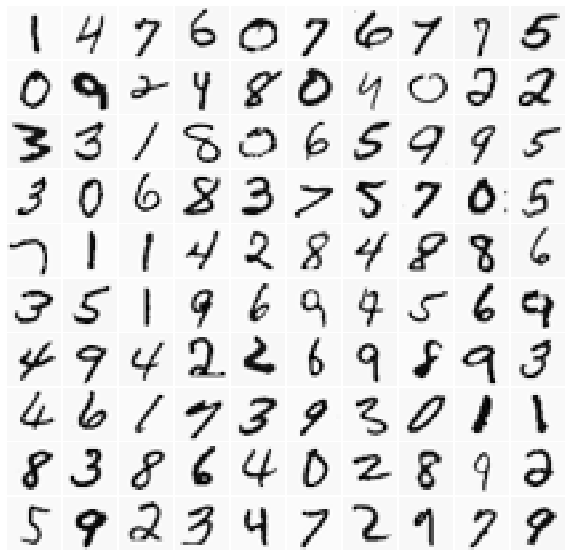

In [42]:
data = loadmat(os.path.join('ex3data1.mat'))
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
m = y.size
indices = np.random.permutation(m)
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
displayData(sel)

In [43]:
input_layer_size  = 400 
hidden_layer_size = 25   
num_labels = 10          
weights = loadmat(os.path.join('Data', 'ex3weights.mat'))
Theta1, Theta2 = weights['Theta1'], weights['Theta2']
Theta2 = np.roll(Theta2, 1, axis=0)



In [44]:
def predictOneVsAll(all_theta, X):
    print(all_theta.shape)
    print(X.shape)
    m = X.shape[0];
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    h = sigmoid(X.dot(np.transpose(all_theta)))
    for i in range (m):
        p = np.argmax(h, axis = 1)
    print(p)
    return p

In [45]:
def predict(Theta1, Theta2, X):
    if X.ndim == 1:
        X = X[None]  
    m = X.shape[0]
    p = np.zeros(X.shape[0])
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    num_labels = Theta2.shape[0]
    z2 = X.dot(Theta1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate([np.ones((z2.shape[0],1)), a2], axis = 1)
    print(a2.shape)
    z3 = a2.dot(Theta2.T)
    a3 = sigmoid(z3)
    print(a3.shape)
    for i in range (m):
        p[i] = np.argmax(a3[i,:], axis = 0)
    return p


In [46]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))


(5000, 26)
(5000, 10)
Training Set Accuracy: 97.5%


(1, 26)
(1, 10)
Neural Network Prediction: 6.0


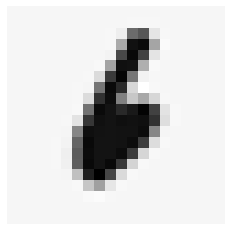

In [47]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')
